Capstone Project-The Battle of Neighbourhoods

Introduction

Capital city of India i.e. New Delhi is having 11 districts with a total population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

Terms Delhi and New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a smaller part of Delhi. 

The local language of New Delhi is Hindi. However, English is also spoken as a formal/official language in businesses private and government organizations.

Delhi population comprising of diverse culture has diverse food items in habits as well. There are many restaurants in New Delhi serving Chinese , Italian , French, Continental etc. So as a part of this project , I will list and visualise all major parts of New Delhi and will work on food supply data. People who wish to enquire about the food habits followed by Delhi people may get benefitted from this analysis.

Data

We need the following data :

New Delhi Resturants data that contains list of Localities, Resturant name,Rating along with their latitude and longitude

Data source : Zomato kaggel dataset : "https://www.kaggle.com/shrutimehta/zomato-restaurants-data"

Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city

Nearby places in each locality of new delhi city

Data source : Fousquare API : "https://developer.foursquare.com/"

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                          |                                                                          failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|3_73_pypy|4_73_pypy|5_73_pypy|2_73_pypy|1_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the versio

ibm-wsrt-py37main-main -> wcwidth==0.2.4[build=*]

Package pandoc conflicts for:
ibm-wsrt-py37main-main -> pandoc==2.9.2.1[build=*]
nbconvert -> pandoc[version='>=1.12.1|>=1.12.1,<2.0.0']

Package py conflicts for:
pyzmq -> py
pytest -> py[version='>=1.4.29|>=1.4.33|>=1.5.0|>=1.8.2']
ibm-wsrt-py37main-main -> py==1.8.2[build=*]

Package pickleshare conflicts for:
ibm-wsrt-py37main-main -> pickleshare==0.7.5[build=*]
ipython -> pickleshare

Package ptyprocess conflicts for:
ibm-wsrt-py37main-main -> ptyprocess==0.6.0[build=*]
pexpect -> ptyprocess[version='>=0.5']
terminado -> ptyprocess

Package termcolor conflicts for:
ibm-wsrt-py37main-main -> termcolor==1.1.0[build=*]
tensorflow-estimator -> termcolor[version='>=1.1.0']
tensorflow-base -> termcolor[version='>=1.1.0|>=1.1.0,<2.0a0']

Package prometheus_client conflicts for:
notebook -> prometheus_client
ibm-wsrt-py37main-main -> prometheus_client==0.8.0[build=*]

Package gmpy2 conflicts for:
sympy -> gmpy2[version='>=2.0.8']
mpmath -

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

Cleaning the data now

In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

Map to show clusters of restraunts

In [11]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [12]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

Places having best restraunts in New Delhi

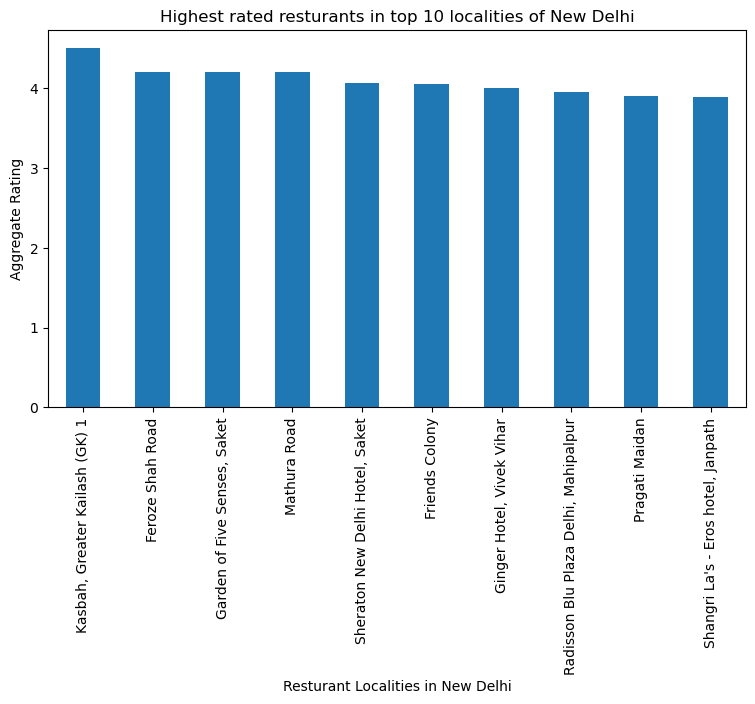

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Highest rated resturants in top 10 localities of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

Places having worst restraunts in New Delhi

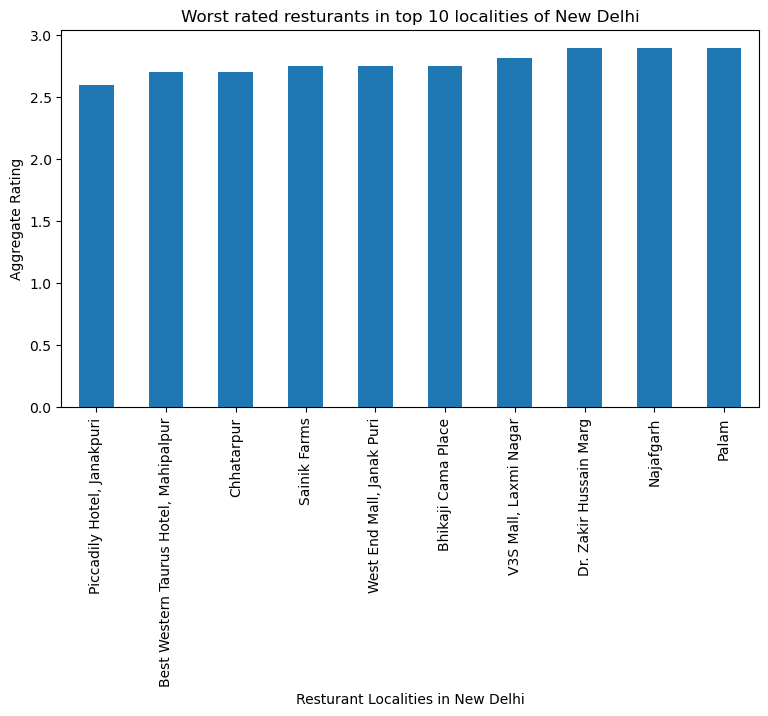

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Worst rated resturants in top 10 localities of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

Places suitable for edible persons in New Delhi

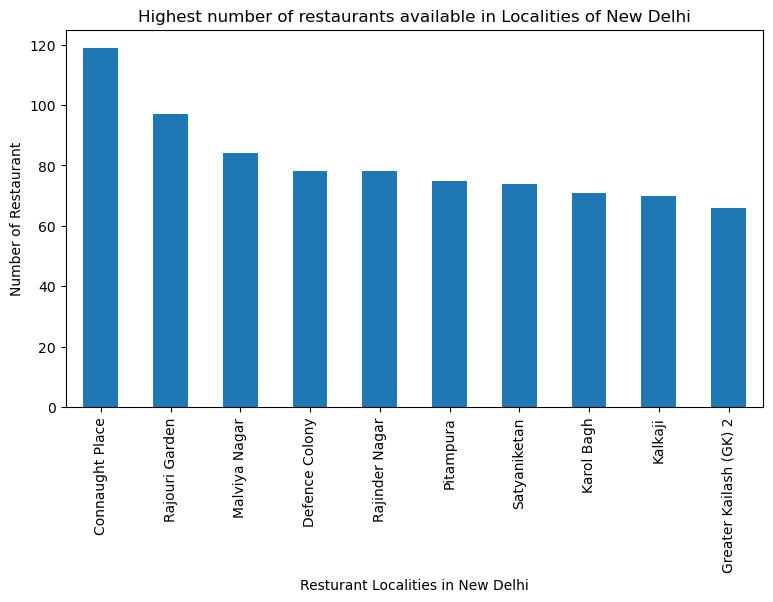

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Highest number of restaurants available in Localities of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Place not suitable for edible persons in New Delhi

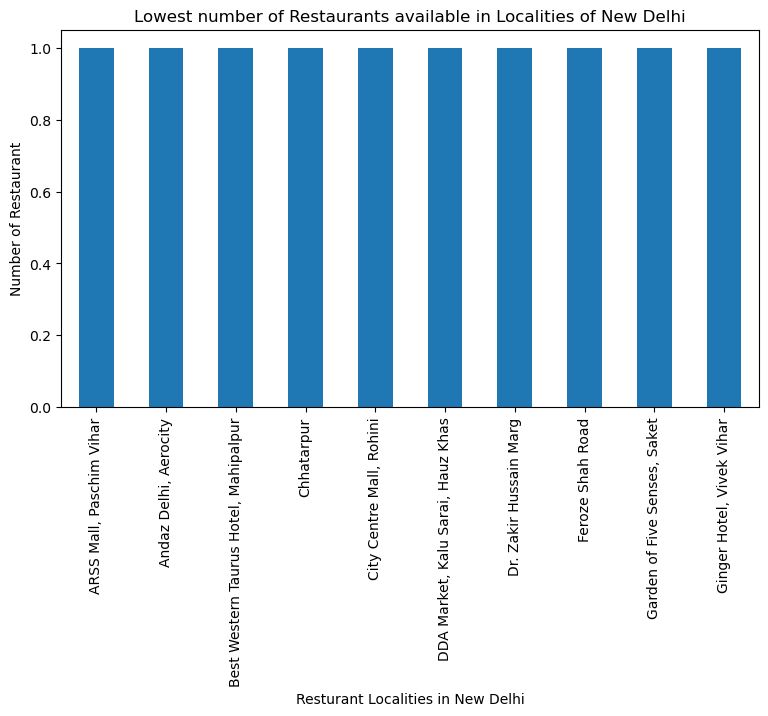

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Lowest number of Restaurants available in Localities of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Localities in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Best places for chinese restaurant in New Delhi

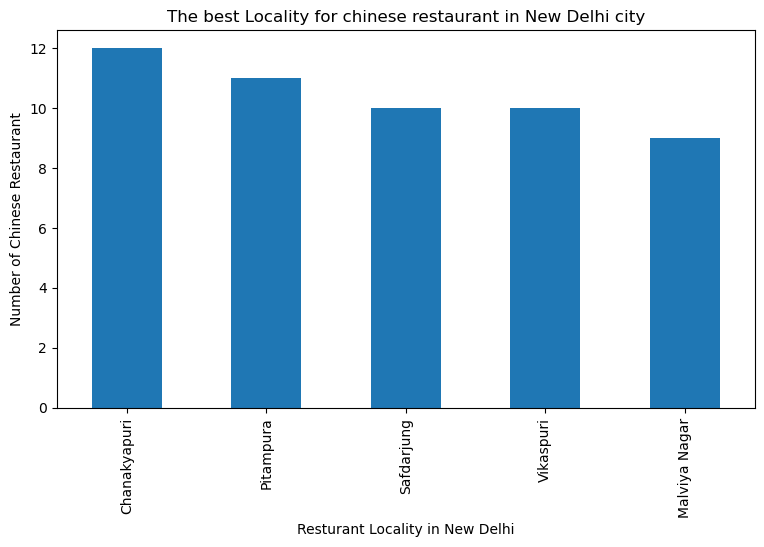

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Grouping the data now based on locality

In [23]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [24]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [25]:
df_final.shape

(240, 8)

Foursquare Credentials and Version

In [26]:
## Define Foursquare Credentials and Version
CLIENT_ID = '02C2QIG02R1IJB5W4BIQ0OFQLGZSL0FLOYQWAETM1IJSYVPD' # Foursquare ID
CLIENT_SECRET = 'Y5TDTSIU22JQOSTXF3TMVJ1AJXAGIL0OL4S5WM34531TOBEJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 02C2QIG02R1IJB5W4BIQ0OFQLGZSL0FLOYQWAETM1IJSYVPD
CLIENT_SECRET:Y5TDTSIU22JQOSTXF3TMVJ1AJXAGIL0OL4S5WM34531TOBEJ


A function to repeat the same process to all the Localities in New Delhi

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Finidng venues in New Delhi

In [29]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [30]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [31]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         9                   9      9   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 17                  17     17   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    14                  14     14   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      9                9   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              17               17   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 14               14   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      9  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              17  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 14  
ibis New Delhi, Aerocity                    28  

[238 rows x 6 columns]

In [32]:

print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [33]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport Food Court  Airport Lounge  Airport Service  \
0                   0                   0               0                0   
1                   0                   0               0                0   
2                   0                   0               0                0   
3                   0                   0               0                0   
4                   0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 210 columns]

In [34]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport Food Court  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   
..                 ...                 ...                 ...   
233                0.0                 0.0                 0.0   
234                0.0                 0.0                 0.0   
235                0.0                 0.0                 0.0   
236                0.0                 0.0                 0.0   
237                0.0                 0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0          0.000000              0.0          0.000000             0.000000   
1          0.000000              0.0          0.000000             0.000000   
2          0.000000              0.0          0.000000             0.000000   
3          0.142857              0.0          0.142857             0.000000   
4          0.000000              0.0          0.000000             0.000000   
..              ...              ...               ...                  ...   
233        0.000000              0.0          0.000000             0.058824   
234        0.000000              0.0          0.000000             0.000000   
235        0.000000              0.0          0.000000             0.000000   
236        0.000000              0.0          0.000000             0.000000   
237        0.000000              0.0          0.000000             0.000000   

     ...  Trail  Train Station  Turkish Restaurant  Udupi Restaurant  \
0    ...    0.0       0.000000                 0.0               0.0   
1    ...    0.0       0.000000                 0.0               0.0   
2    ...    0.0       0.000000                 0.0               0.0   
3    ...    0.0       0.000000                 0.0               0.0   
4    ...    0.0       0.000000                 0.0               0.0   
..   ...    ...            ...                 ...               ...   
233  ...    0.0       0.000000                 0.0               0.0   
234  ...    0.0       0.000000                 0.0               0.0   
235  ...    0.0       0.033333                 0.0               0.0   
236  ...    0.0       0.000000                 0.0               0.0   
237  ...    0.0       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                         0.000000                    0.0         0.0   
1                         0.000000                    0.0         0.0   
2                         0.000000                    0.0         0.0   
3                         0.000000                    0.0         0.0   
4                         0.000000                    0.0         0.0   
..                             ...                    ...         ...   
233                       0.000000                    0.0         0.0   
234                

In [35]:
New_Delhi_grouped.shape

(238, 210)

In [36]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Pizza Place  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0                Pub  0.22
1  Indian Restaurant  0.22
2               Café  0.22
3   Parsi Restaurant  0.11
4        Coffee Shop  0.11


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1        Pizza Place   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1           Coffee Shop  0.14
2        Airport Lounge  0.14
3      Airport Terminal  0.14
4  Fast Food Restaurant  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0  Indian Restaurant   0.4
1   Department Store   0.2
2               Food   0.2
3        Pizza Place   0.2
4             Museum   0.0


----Aggarwal C

                         venue  freq
0     Bike Rental / Bike Share  0.33
1                  Pizza Place  0.33
2                   Food Truck  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Garden of Five Senses, Saket----
                venue  freq
0         Coffee Shop  0.25
1              Garden  0.12
2  Italian Restaurant  0.12
3                 Pub  0.12
4                Café  0.12


----Geeta Colony----
                            venue  freq
0                    Burger Joint   1.0
1                             ATM   0.0
2  Multicuisine Indian Restaurant   0.0
3                          Museum   0.0
4                     Music Store   0.0


----Ginger Hotel, Vivek Vihar----
               venue  freq
0              Hotel  0.33
1          BBQ Joint  0.17
2               Café  0.17
3  Indian Restaurant  0.17
4   Asian Restaurant  0.17


----Gourmet Hub, Pashim Vihar----
               venue  freq
0  Food & Drink Shop   0.2
1        Pizza Place

                       venue  freq
0        Japanese Restaurant  0.07
1                     Temple  0.07
2         Italian Restaurant  0.07
3          Indian Restaurant  0.07
4  Middle Eastern Restaurant  0.07


----MG Road----
                         venue  freq
0       Furniture / Home Store  0.33
1            Indian Restaurant  0.33
2                   Art Museum  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----MGF Metropolitan Mall, Saket----
                venue  freq
0   Indian Restaurant  0.11
1                 Bar  0.07
2      Clothing Store  0.07
3              Lounge  0.07
4  Chinese Restaurant  0.06


----MGM Club, Daryaganj----
               venue  freq
0         Restaurant  0.33
1  Indian Restaurant  0.33
2              Hotel  0.17
3               Road  0.17
4             Office  0.00


----Mahipalpur----
                 venue  freq
0                Hotel  0.25
1                Plaza  0.08
2  American Restaurant  0.08
3           Sh

                 venue  freq
0                Hotel  0.32
1            Hotel Bar  0.07
2          Coffee Shop  0.07
3  Japanese Restaurant  0.04
4     Department Store  0.04


----SDA----
                venue  freq
0                Café  0.25
1   Indian Restaurant  0.17
2         Beer Garden  0.08
3      Sandwich Place  0.08
4  Chinese Restaurant  0.08


----Safdarjung----
                 venue  freq
0                 Café  0.17
1    Indian Restaurant  0.17
2  American Restaurant  0.08
3          Coffee Shop  0.08
4           Restaurant  0.08


----Sainik Farms----
               venue  freq
0   Asian Restaurant  0.33
1                Pub  0.17
2  Indian Restaurant  0.17
3         Restaurant  0.17
4             Bakery  0.17


----Saket----
                venue  freq
0         Pizza Place  0.15
1                Café  0.15
2         Coffee Shop  0.08
3  Falafel Restaurant  0.08
4   Convenience Store  0.08


----Sangam Courtyard, RK Puram----
             venue  freq
0        Multiplex

                venue  freq
0  Chinese Restaurant  0.13
1   Indian Restaurant  0.13
2  Light Rail Station  0.07
3       Metro Station  0.07
4     Business Center  0.07


----West Gate Mall, Rajouri Garden----
                  venue  freq
0  Fast Food Restaurant  0.18
1           Pizza Place  0.12
2                  Café  0.12
3     Indian Restaurant  0.06
4        Cosmetics Shop  0.06


----West Patel Nagar----
         venue  freq
0    Juice Bar  0.25
1  Pizza Place  0.25
2         Park  0.25
3        Hotel  0.25
4          ATM  0.00


----Worldmark 1, Aerocity----
                 venue  freq
0                Hotel  0.30
1          Coffee Shop  0.07
2      Bed & Breakfast  0.07
3            Hotel Bar  0.07
4  Japanese Restaurant  0.03


----Yusuf Sarai----
                venue  freq
0   Indian Restaurant  0.14
1         Coffee Shop  0.14
2                 Bar  0.07
3  Chinese Restaurant  0.07
4               Hotel  0.07


----ibis New Delhi, Aerocity----
                 venue  fre

In [37]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura     Indian Restaurant   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar           Pizza Place   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM                Market           Coffee Shop   
1                     Pub                  Café              Boutique   
2           Shopping Mall     Indian Restaurant             Multiplex   
3        Airport Terminal        Airport Lounge   Rental Car Location   
4             Pizza Place                  Food      Department Store   
..                    ...                   ...                   ...   
233           Pizza Place                  Café        Cosmetics Shop   
234             Juice Bar                  Park                 Hotel   
235           Coffee Shop       Bed & Breakfast             Hotel Bar   
236           Coffee Shop   Japanese Restaurant                 Hotel   
237           Coffee Shop             Hotel Bar   Japanese Restaurant   

    5th Most Common Venue 6th Most Common Venue  \
0      Chinese Restaurant        Sandwich Place   
1        Parsi Restaurant           Coffee Shop   
2                   Hotel                  Café   
3             Coffee Shop  Fast Food Restaurant   
4                   Diner           Flea Market   
..                    ...                   ...   
233           Snack Place    Light Rail Station   
234        Farmers Market    Frozen Yogurt Shop   
235   Japanese Restaurant                Lounge   
236                  Park  Fast Food Restaurant   
237            Restaurant         Shopping Mall   

              7th Most Common Venue   8th Most Common Venue  \
0    Multicuisine Indian Restaurant             Pizza Place   
1                 Fish & Chips Shop      Frozen Yogurt Shop   
2              Fast Food Restaurant     Fried Chicken Joint   
3                 French Restaurant              Food Truck   
4                       Gaming Cafe  Furniture / Home Store   
..                              ...                     ...   
233                      Hookah Bar                  Garden   
234             Fried Chicken Joint       French Restaurant   
235               Indian Restaurant      Punjabi Restaurant   
236              Chinese Restaurant                     Bar   
237                Department Store               Gastropub   

    9th Most Common Venue 10th Most Common Venue  
0                   Hotel     Falafel Restaurant  
1     Fried Chicken Joint      French Restaurant  
2       French Restaurant             Food Truck  
3       Fish & Chips Shop             Food Court  
4      Frozen Yogurt Shop    Fried Chicken Joint  
..                    ...                    ...  
233             Multiplex             Restaurant  
234            Food Truck             Food Court  
235            Restaurant              Gastropub  
236      Asian Restaurant           Dessert Shop  
237       Bed & Breakfast                    Spa  

[238 rows x 11 columns]

In [39]:
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [45]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               0   
3                         Average           59               2   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                   Pub                  Café   
2           Pizza Place         Shopping Mall     Indian Restaurant   
3                 Hotel      Airport Terminal        Airport Lounge   
4     Indian Restaurant           Pizza Place                  Food   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1              Boutique      Parsi Restaurant           Coffee Shop   
2             Multiplex                 Hotel                  Café   
3   Rental Car Location           Coffee Shop  Fast Food Restaurant   
4      Department Store                 Diner           Flea Market   

            7th Most Common Venue   8th Most Common Venue  \
0  Multicuisine Indian Restaurant             Pizza Place   
1               Fish & Chips Shop      Frozen Yogurt Shop   
2            Fast Food Restaurant     Fried Chicken Joint   
3               French Restaurant              Food Truck   
4                     Gaming Cafe  Furniture / Home Store   

  9th Most Common Venue 10th Most Common Venue  
0                 Hotel     Falafel Restaurant  
1   Fried Chicken Joint      French Restaurant  
2     French Restaurant             Food Truck  
3     Fish & Chips Shop             Food Court  
4    Frozen Yogurt Shop    Fried Chicken Joint

In [46]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:

## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
2    28.656131    3.275000                        Average, Good          434   
4    28.690020    3.033333                              Average          126   
13   28.690182    3.090000                  Average, Good, Poor          971   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
65   28.556980    3.272414                  Average, Good, Poor         5243   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
108  28.563827    3.800000                      Good, Very Good         1092   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
159  28.613748    3.900000                   Average, Excellent         2313   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
197  28.592724    2.985714                              Average          560   
198  28.636712    3.023529                        Average, Poor          185   
201  28.651299    3.500000                        Average, Good          479   
203  28.601187    3.633333                        Average, Good         1018   
208  28.562469    2.971429                  Average, Good, Poor          486   
210  28.661133    3.775000                      Good, Very Good          460   
221  28.560593    3.733333             Average, Good, Very Good          615   
222  28.628988    3.260000                  Average, Good, Poor          239   

     Cluster Labels   1st Most Common Venue          2nd Most Common Venue  \
0                 0       Indian Restaurant                            ATM   
2                 0             Pizza Place                  Shopping Mall   
4                 0       Indian Restaurant                    Pizza Place   
13                

In [48]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
..         ...         ...                                  ...          ...   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
232  28.667344    3.077273                  Average, Good, Poor          939   
236  28.648177    3.675000             Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                 1     Indian Restaurant                   Pub   
6                 1           Coffee Shop            Steakhouse   
7                 1           Coffee Shop  Fast Food Restaurant   
8                 1               Stadium                  Café   
9                 1                  Café                   ATM   
..              ...                   ...                   ...   
228               1           Snack Place                  Café   
229               1                Bakery                  Café   
231               1           Pizza Place  Fast Food Restaurant   
232               1             Juice Bar      Department Store   
236               1           Pizza Place             Juice Bar   

    3rd Most Common Venue    4th Most Common Venue   5th Most Common Venue  \
1                    Café                 Boutique        Parsi Restaurant   
6       Food & Drink Shop  New American Restaurant                  Market   
7                    Café       Italian Restaurant        Asian Restaurant   
8           Metro Station             Dessert Shop             Golf Course   
9            Burger Joint            Burrito Place                  Garden   
..                    ...                      ...                     ...   
228                Garden              Gaming Cafe  Furniture / Home Store   
229  Fast Food Restaurant              Cheese Shop                Tea Room   
231             Multiplex           Ice Cream Shop      Frozen Yogurt Shop   
232    Athletics & Sports          Bed & Breakfast       Mobile Phone Shop   
236                  Park                    Hotel          Farmers Market   

      6th Most Common Venue   7th Most Common Venue   8th Most Common Venue  \
1               Coffee Shop       Fish & Chips Shop      Frozen Yogurt Shop   
6             Women's Store       Fish & Chips Shop  Furniture / Home Store   
7             Shopping Mall       Indian Restaurant      Chinese Restaurant   
8               Music Venue                   Hotel             Coffee Shop   
9    Furniture / Home Store      Frozen Yogurt Shop     Fried Chicken Joint   
..                      ...                     ...                     ...   
228      Frozen Yogurt Shop     Fried Chicken Joint       French Restaurant   
229              Restaurant             Coffee Shop     American Restaurant   
231     Fried Chicken Joint       French Restaurant              Food Truck   
232             Gaming Cafe  Furniture / Home Store      Frozen Yogurt Shop   
236      Frozen Yogurt Shop     Fried Chicken Joint       French Restaurant   

    9th Most Common Venue 10th Most Common Venue  
1     Fried Chicken Joint      French Restaurant  
6      Frozen Yogurt Shop    Fried Chicken Joint  
7          Clothing Store    Japanese Restaurant  
8    Other Great Outdoors          Women's Store  
9       French Restaurant             Food Truck  
..                    ...                    ...  
22

In [49]:

## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
93   28.554084    3.541667             Average, Good, Very Good         3781   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 2                 Hotel      Airport Terminal   
10                2                 Hotel           Coffee Shop   
12                2         Movie Theater     Indian Restaurant   
19                2                 Hotel     Accessories Store   
25                2   Japanese Restaurant            Donut Shop   
35                2                 Hotel      Department Store   
56                2                 Hotel      Sculpture Garden   
60                2                 Hotel      Asian Restaurant   
69                2                 Hotel           Coffee Shop   
70                2                 Hotel            Restaurant   
72                2                 Plaza                  Park   
74                2                 Hotel                   Spa   
83                2                 Hotel           Coffee Shop   
93                2                 Hotel     Indian Restaurant   
111               2                 Hotel            Restaurant   
112               2                 Hotel           Coffee Shop   
119               2                 Hotel       Bed & Breakfast   
120 

In [50]:

## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
5    28.700516    3.040000             Average, Good, Poor          594   
15   28.691136    3.390909        Average, Good, Very Good          485   
22   28.654105    3.085714                         Average           80   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
89   28.539003    3.150000             Average, Good, Poor          893   
90   28.642755    3.450000                   Average, Good          322   
94   28.538153    3.117143             Average, Good, Poor         3642   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
135  28.579641    3.180000                   Average, Good          202   
151  28.592153    3.200000                         Average           14   
160  28.712975    3.066667                         Average          121   
169  28.667261    3.200000                         Average           76   
170  28.643757    3.575000                   Average, Good         2879   
180  28.534499    3.000000             Average, Good, Poor          173   
187  28.629634    2.942857                         Average          151   
189  28.620715    3.880000        Average, Good, Very Good          626   
218  28.552403    3.833333                 Good, Very Good         1133   
220  28.523519    3.700000                            Good          281   
224  28.636921    2.819231             Average, Good, Poor         2265   
225  28.524070    3.686364        Average, Good, Very Good         4001   
230  28.658041    3.400000                         Average           19   
233  28.695096    3.050000                         Average           86   
234  28.630044    2.750000                   Average, Poor          238   

     Cluster Labels     1st Most Common Venue    2nd Most Common Venue  \
5                 3      Fast Food Restaurant     Gym / Fitness Center   
15                3               Pizza Place     Gym / Fitness Center   
22                3               Pizza Place     Fast Food Restaurant   
50                3               Pizza Place               Donut Shop   
57                3  Bike Rental / Bike Share               Food Truck   
73                3               Pizza Place             Liquor Store   
89                3              Soccer Field           Soccer Stadium   
90                3               Pizza Place     Fast Food Restaurant   
94                3                    Market     Fast Food Restaurant   
101               3               Pizza Place              Bus Station   
103               3                       ATM        Fish & Chips Shop   
104               3               Pizza Place     Fast Food Restaurant   
110               3               Pizza Place                Multiplex   
130               3               Pizza Place               Theme Park   
132               3               Pizza Place     Fast Food Restaurant   
135               3               Pizza Place  South Indian Restaurant   
151               3                Campground              Golf Course   
160               3         Indian Restaurant              Pizza Place   
169               3                     Hotel     Fast Food Restaurant   
170               3               Pizza Place     Fast Food Restaurant   
180               3                      Café           Ice Cream Shop   
187               3               Snack Place            

In [51]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
59  28.654883    3.053846  Average, Good          262               4   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
59          Burger Joint         Women's Store      Department Store   

   4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
59           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
59   Fried Chicken Joint     French Restaurant            Food Truck   

   10th Most Common Venue  
59             Food Court

Conclusion

 Some of the best neighborhoods for Chinese cuisine in New Delhi are Chanakyapuri, Pitampura, Safdarjung.
 Best places for edible persons in New Delhi are Cannaught place, Rajouri garden, Malviya nagar.
 Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
 Cluster 1: Most recommended for Indian Restaurants.
 Cluster 2: Most recommended for Hotels and nightclub.
 Cluster 3 and Cluster 5: Most recommended for Fast food.
 Cluster 4: Most recommended for the cafe and pizza.